<a href="https://colab.research.google.com/github/JasonLiu2024/FutureMakers2022/blob/main/OCR_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import pandas as pd
import numpy as np
import collections

In [3]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (827 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 17 kB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [5]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [6]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [7]:
!pwd

/content


In [10]:
images= convert_from_path('TEST_DOC_2.pdf')

PDFPageCountError: ignored

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

# New Section

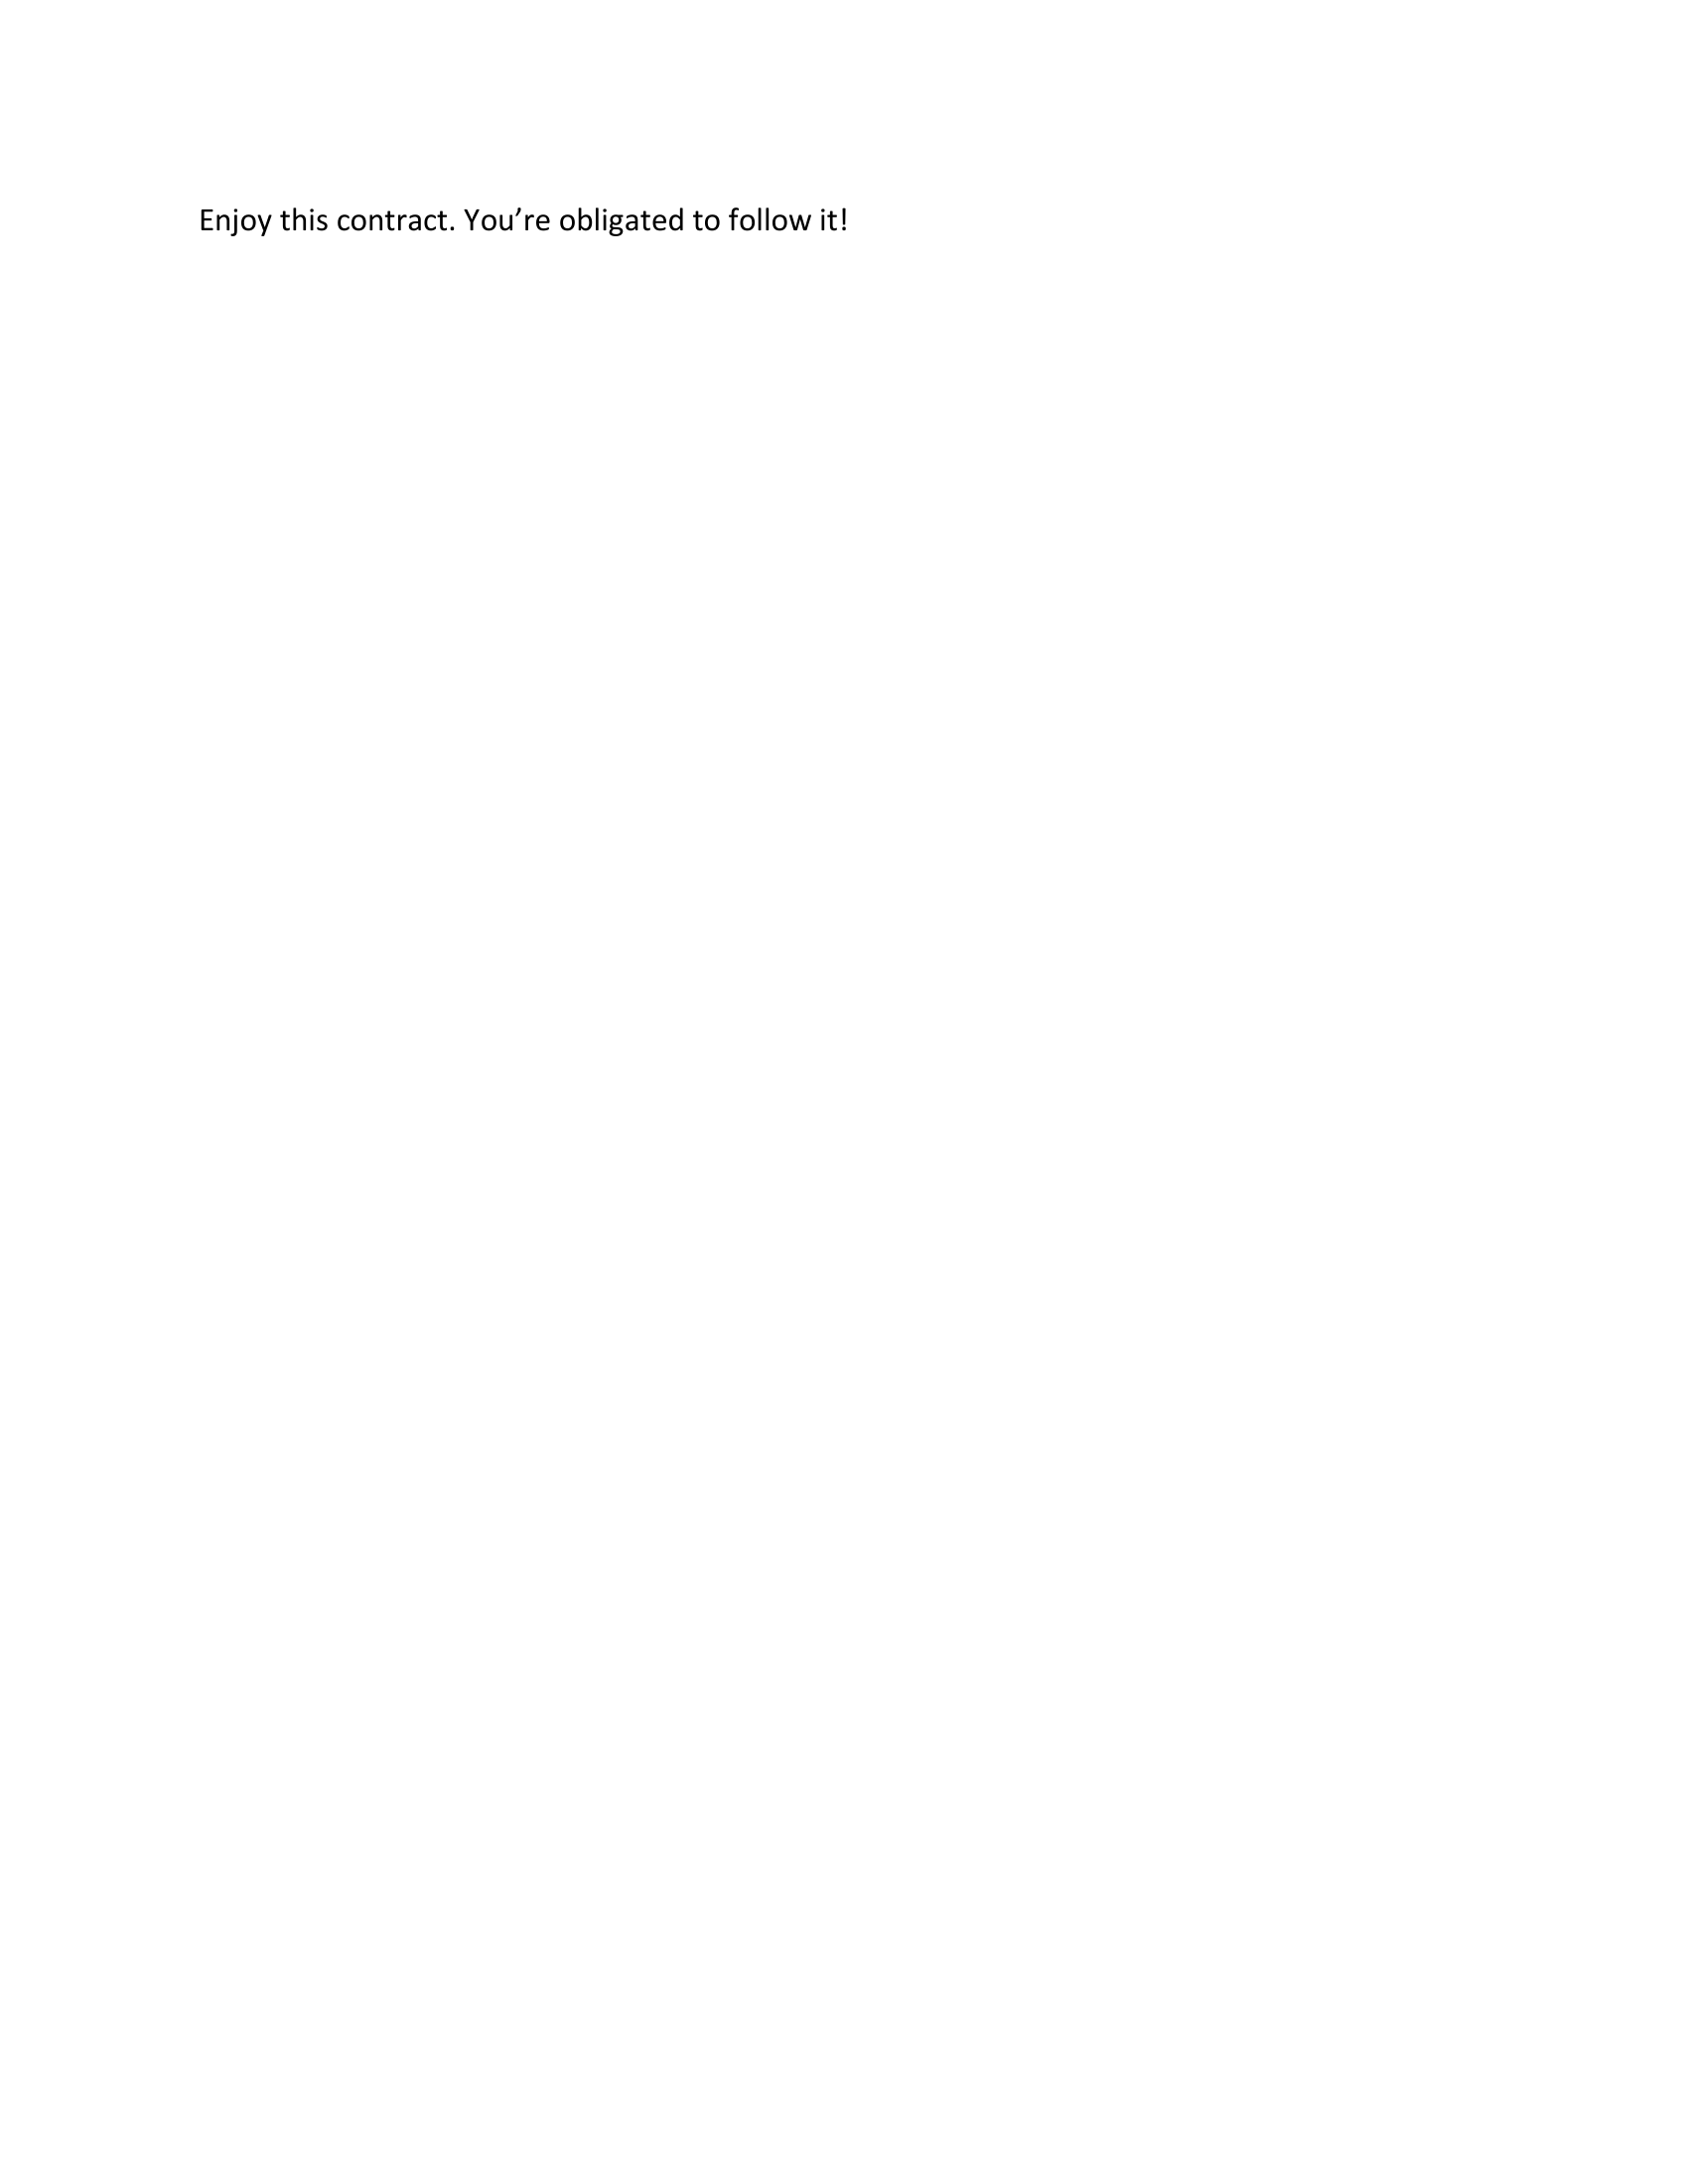

In [ ]:
from IPython.display import display, Image
display(images[0])

In [ ]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[197, 205], [859, 205], [859, 245], [197, 245]],
  "Enjoy this contract: You're obligated to follow it!",
  0.877474540379445)]

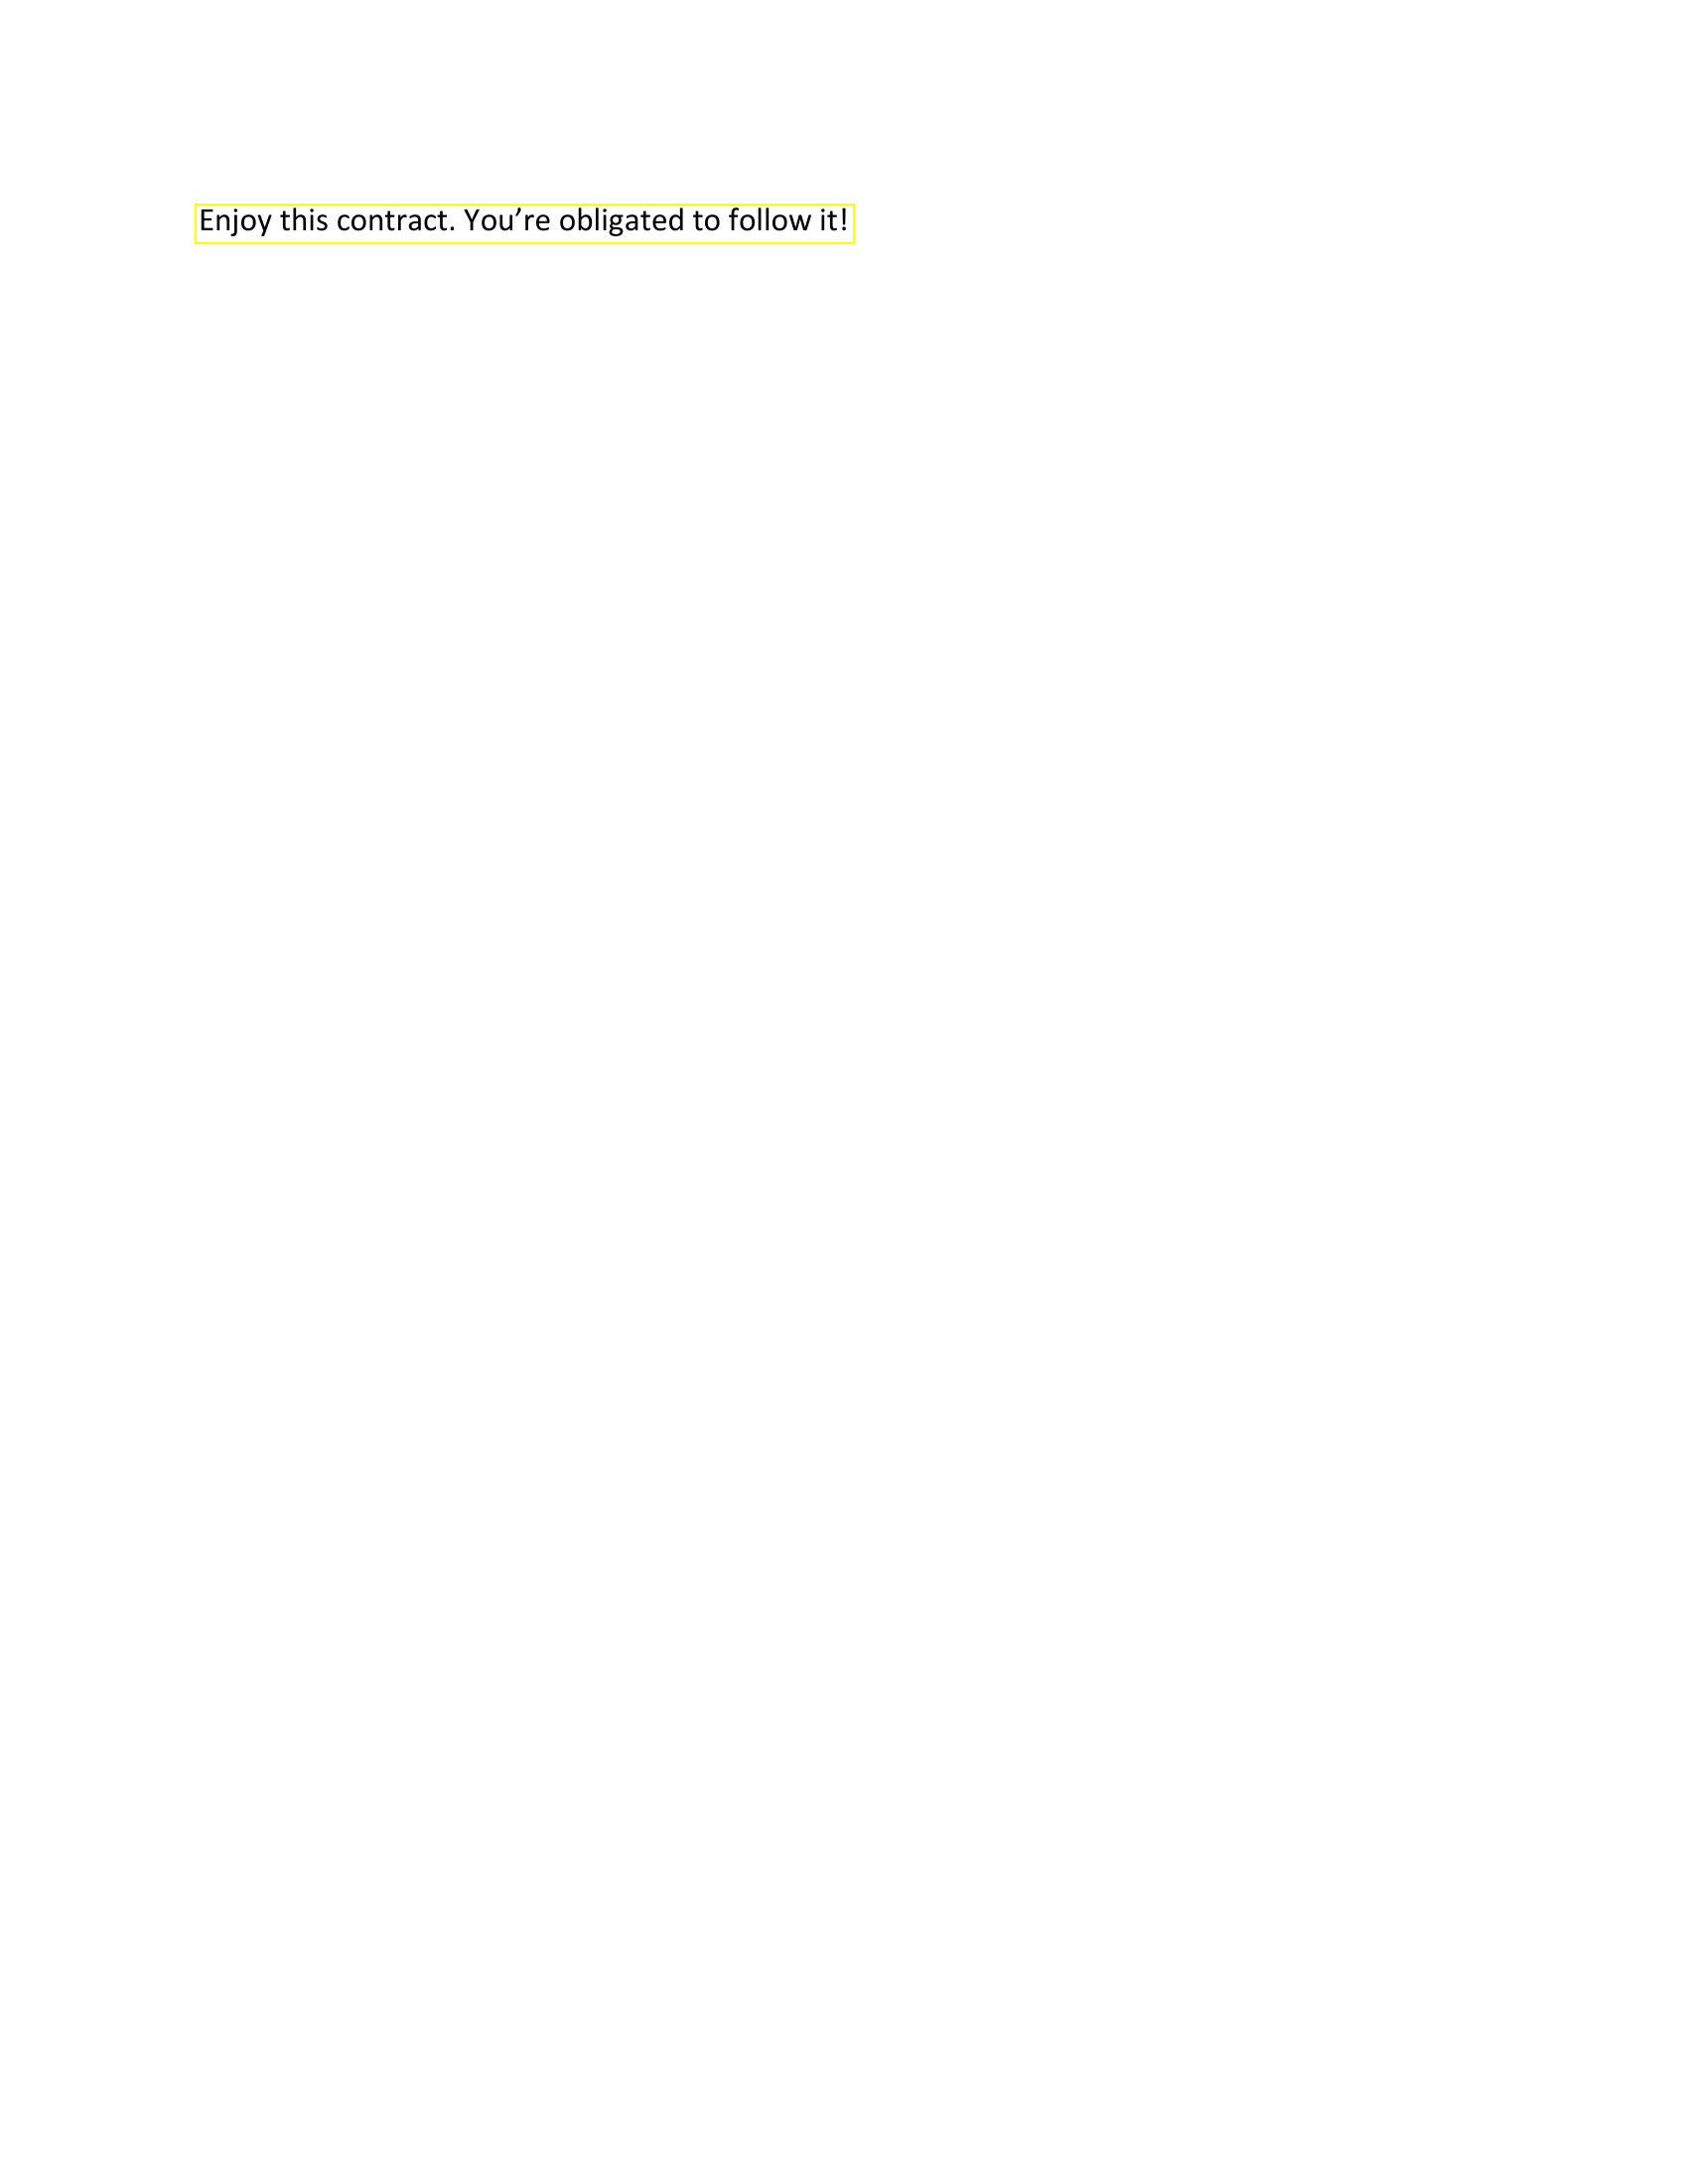

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [ ]:
#bounds[1][1]

In [ ]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Enjoy this contract: You're obligated to follow it!



In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
text = "Enjoy this contract. You're obligated to follow it!"
sentences = sent_tokenize(text)

In [14]:
#tokenize by words
"""k = 0
output = []
for i in sentences:
  words = word_tokenize(i)
  """Enjoy this contract -> words = [Enjoy, this, contract]"""
  for j in words:
    output.append([j, k, 0, ""])
  k = k + 1"""

"""print(output[0])"""

SyntaxError: ignored

In [18]:
#tokenize by sentence
k = 0
output = []
for i in sentences:
  output.append([i, k, ""])
  k = k + 1

print(output[0])
print(output[1])

['Enjoy this contract.', 0, '']
["You're obligated to follow it!", 1, '']


In [ ]:
np.savetxt("Output.csv", 
           output,
           delimiter =", ", 
           fmt ='% s')
import csv
with open('Output.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(output)

In [ ]:
"""Ideal output:
  line 1: Enjoy, sent index = 0, isLegal = 0, definition = ""
  line 2: this, sent index = 0, isLegal = 0, definition = ""
  line 3: contract, sent index = 0, isLegal = 0, definition = ""
  line 4: You're, sent index = 1...
  """

'Ideal output:\n  line 1: Enjoy, sent index = 0, isLegal = 0, definition = ""\n  line 2: this, sent index = 0, isLegal = 0, definition = ""\n  line 3: contract, sent index = 0, isLegal = 0, definition = ""\n  line 4: You\'re, sent index = 1...\n  '

In [ ]:
"""def tokenize(s):
  t = re.sub(r"[^a-zA-Z0-9]", " ", s).split() #if needed, use s.lower so everything is lower case
  return t
words = tokenize(text)
print(words)

np.savetxt("Output.csv", 
           words,
           delimiter =", ", 
           fmt ='% s')
import csv
with open('csv_Output', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(words)"""

'def tokenize(s):\n  t = re.sub(r"[^a-zA-Z0-9]", " ", s).split() #if needed, use s.lower so everything is lower case\n  return t\nwords = tokenize(text)\nprint(words)\n\nnp.savetxt("Output.csv", \n           words,\n           delimiter =", ", \n           fmt =\'% s\')\nimport csv\nwith open(\'csv_Output\', \'w\') as f:\n      \n    # using csv.writer method from CSV package\n    write = csv.writer(f)\n    write.writerow(words)'

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

In [ ]:
#from spacy import displacy

#displacy.render(nlp(doc.text),style='ent', jupyter=True)